In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
seq_spike = torch.zeros([100])
seq_spike[20:30] = 1.0
seq_spike[50:95] = 1.0
#random_ones = torch.randint(0, 2, (1000,)).float()
#seq_spike = random_ones

In [3]:
kernel_size = 4
#kernel = 1.0 / (2 ** torch.arange(kernel_size).float())  # (32,)
kernel = torch.tensor([1/8, 1/4, 1/2, 1.0])
kernel_sum = kernel.sum()
print(f"Kernel sum: {kernel_sum.item()}")

Kernel sum: 1.875


In [4]:
# convolve the spike sequence with the kernel
conv_spike = F.conv1d(seq_spike.view(1, 1, -1), kernel.view(1, 1, -1), padding=kernel_size // 2)

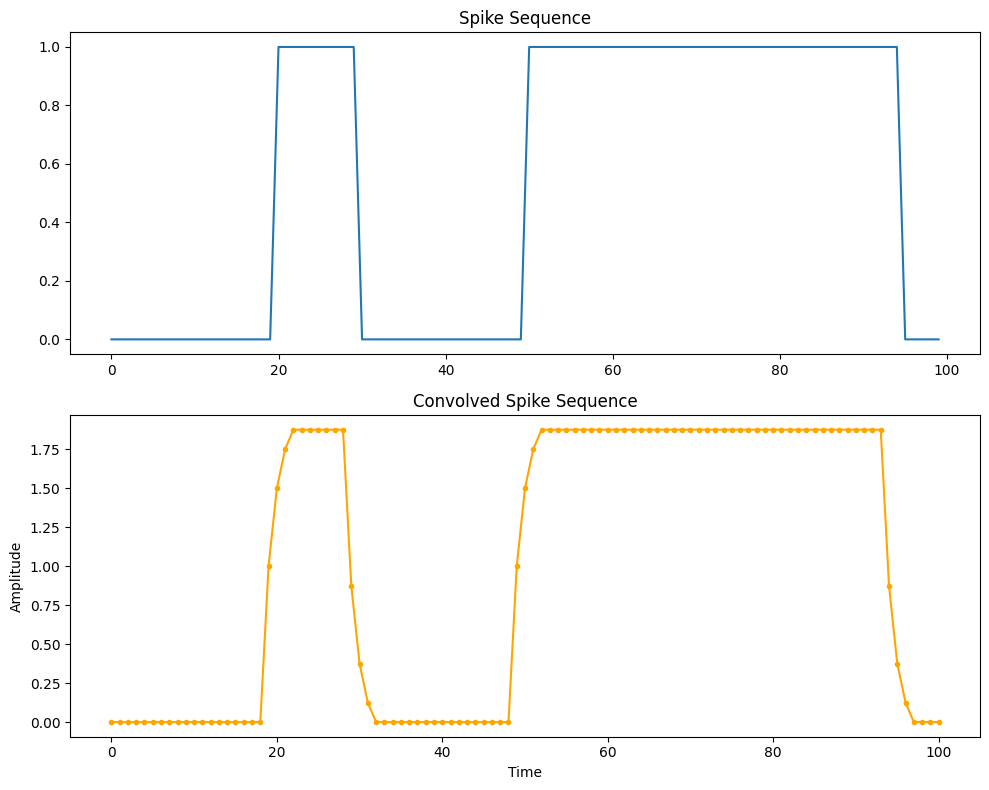

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(seq_spike.numpy(), label='Spike Sequence')
axes[0].set_title('Spike Sequence')

axes[1].plot(conv_spike.view(-1).numpy(), label='Convolved Spike Sequence', color='orange', marker='.')
axes[1].set_title('Convolved Spike Sequence')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()